# COGS 108 - Final Project 

# Overview

In the project, I will use TF-IDF to analyze the yelp reviews of parks in San Diego, find whether the ratings and comments are matched, and if it is matched, what features do people like the most about the parks in San Diego.
The result is that the accuracy of the testing data is 80% and validation is 79%. This means that most of the ratings and comments are matched. The most liked features are bridge, hotel, trolley, party and so on. In this way, to attrct more visitors to the parks in San Diego, the city might add on or maintain these elements for its parks.

# Name & GitHub

- Name: Yiyang Cao
- GitHub Username: yiyang-cao

# Research Question

For the comments and ratings about the parks in San Diego, do they match each other? (For high ratings, the comments are relatively positive. For low ratings, the comments are relatively negative.) If they match, what features do people like the most?

## Background and Prior Work

For San Diego parks and recreation programs, there are over 42,000 acres of park assets, which includes almost 27,000 acres of open space and aquatic areas. The Department provides a wide variety of opportunities with over 400 parks, including Balboa Park and Mission Bay Park and 25.9 miles of oceanfront shoreline. Open space areas conserve and protect a rich variety of sensitive habitat and cultural history and provide educational opportunities in a natural setting. Recreational programs include ceramics, learn-to-swim, karate, gymnastics, dance, organized sports, golf, day camps, holiday events, senior and teen activities, tiny tot classes, therapeutic recreation activities, nature programs and much more.

Recent research suggests that reviews found on social networks and review sites like Yelp may not be as reliable as people think. According to this study, roughly 20% of restaurant reviews (positive and negative) are fake.
91% of people trust online reviews as much as personal recommendations - but about 20% of reviews are fake
Fake reviews have created problems for both honest businesses and consumers, and it's easy to see why. Each additional one-star Yelp rating causes an increase in business revenue as high as 9 percent. Since reviews directly impact revenue, this creates motivation for businesses to improve their Yelp page. Some businesses take extreme and/or dishonest measures to do so.

References (include links):
- 1)https://www.sandiego.gov/park-and-recreation/general-info
- 2)https://blog.reputationx.com/are-online-reviews-reliable#:~:text=Recent%20research%20suggests%20that%20reviews,positive%20and%20negative)%20are%20fake.

# Hypothesis

The comments and ratings match each other since I believe most of the people would rate and comment honestly and because of parks are not like other profitable businesses, the fake reviews shown above might not be applied here.

# Dataset(s)

- Dataset Name: yelp_SD_reviews.csv
- Link to the dataset:
- Number of observations: 3





# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import nltk package 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# import random for randomizing
import random

# scikit-learn imports
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support

# silence warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/jiushou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiushou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('Desktop/individual_fa20/data/yelp_SD_reviews.csv')
df

,id,rating,text
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."
...,...,...,...
2328,Petco Park,5,I have visited over 27 MLB Ballparks including...
2329,Ann D. L'Heureux Memorial Dog Park,4,No grass here but it's a great dog park. if yo...
2330,Ann D. L'Heureux Memorial Dog Park,3,"I love taking our cholate lab here, however, t..."
2331,Ann D. L'Heureux Memorial Dog Park,3,Pretty small dog park overall. The center of t...


# Data Cleaning

Describe your data cleaning steps here.

In [4]:
# determine which columns have missing data
df.isna().any()

id        False
rating    False
text      False
dtype: bool

In [5]:
var_missing = sum(df.isna().sum())
var_missing

0

In [6]:
# rename column
df = df.rename({'id':'park_name'}, axis='columns')

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

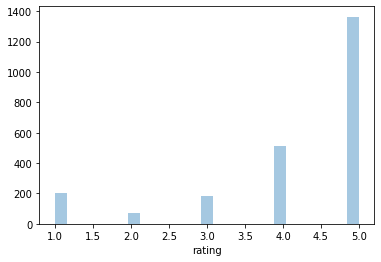

In [7]:
# distribution of rating
sns.distplot(df['rating'], kde=False, bins=25);

f1 = plt.gcf()

In [8]:
# convert rating greater than 3 to most like, less than or equal to 3 to least like
def convert_rating(rate):
    if rate>3:
        return 1.0
    else:
        return 0.0

In [9]:
df['most_least'] = df['rating'].apply(convert_rating)
df.head()

,park_name,rating,text,most_least
0,Balboa Park,5,Balboa Park is a must see when coming to San D...,1.0
1,Balboa Park,5,Beautiful grounds even to take a stroll during...,1.0
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...,1.0
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...,1.0
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is...",1.0


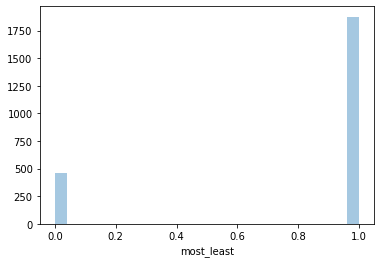

In [10]:
# distribution of most_least
sns.distplot(df['most_least'], kde=False, bins=25);

f1 = plt.gcf()

In [11]:
# randomly sort data frame
df = df.sample(frac=1, random_state=200).reset_index(drop=True)
df.head()

,park_name,rating,text,most_least
0,Southwest Middle School,5,Southwest middle school is a great school that...,1.0
1,Del Rio Apartment Homes,5,"Love these apartment homes, but nothing comes ...",1.0
2,Sandburg Child Development Center,4,I have 2 daughters enrolled at CDC. The time t...,1.0
3,Quince Street Bridge,5,Enjoyable Bridge there are many different Brid...,1.0
4,La Jolla International Gardens,5,I never expected to give a review to an apartm...,1.0


In [12]:
df.shape

(2333, 4)

In [13]:
# Train/Test
df_traintest = df.iloc[:int(len(df)*0.8)]

# Validation
df_validation = df.iloc[int(len(df)*0.8):]

In [14]:
# Create vectorizer & specify parameters
tfidf = TfidfVectorizer(sublinear_tf=True, 
                        analyzer='word',   
                        max_features=500, 
                        tokenizer=word_tokenize)

In [15]:
tfidf_X = tfidf.fit_transform(df_traintest['text']).toarray()

In [16]:
# get IDF to visuzlize
idf = tfidf.idf_
rr = dict(zip(tfidf.fit(df_traintest['text']).get_feature_names(), idf))

token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)
token_weight.head()

,token,weight
80,bridge,6.134193
213,hotel,6.047181
283,moving,5.967139
447,trolley,5.967139
351,rent,5.893031


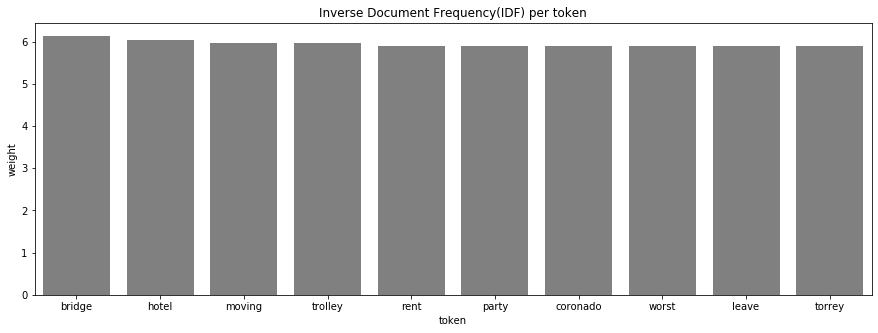

In [17]:
sns.barplot(x='token', 
            y='weight', 
            data=token_weight[0:10], 
            color="gray")            
plt.title("Inverse Document Frequency(IDF) per token")
fig = plt.gcf()
fig.set_size_inches(15,5);

In [18]:
# specify outcome variable
tfidf_Y = np.array(df_traintest['most_least'])

In [19]:
# specify training and test
num_training = int(len(df_traintest)*0.8)
num_testing = len(df_traintest)-num_training

print(num_training, num_testing)

1492 374


In [20]:
# get data
# because rows have been randomized previously
tfidf_train_X = tfidf_X[:num_training]
tfidf_train_Y = tfidf_Y[:num_training]
tfidf_test_X = tfidf_X[num_training:]
tfidf_test_Y = tfidf_Y[num_training:]

In [21]:
def train_SVM(X, Y, kernel='linear'):
    model = SVC(kernel=kernel)
    model.fit(X, Y)
    return model

In [22]:
# train model
svm_model = train_SVM(tfidf_train_X, tfidf_train_Y)

In [23]:
# predict on training
df_predicted_train_Y = svm_model.predict(tfidf_train_X)

In [24]:
# see how many were predicted most vs. least
pd.Series(df_predicted_train_Y).value_counts()

1.0    1436
0.0      56
dtype: int64

In [25]:
# predict on testing
df_predicted_test_Y = svm_model.predict(tfidf_test_X)

In [26]:
# see how many were predicted most vs. least
pd.Series(df_predicted_test_Y).value_counts()

1.0    360
0.0     14
dtype: int64

In [27]:
print(classification_report(tfidf_train_Y, df_predicted_train_Y))

              precision    recall  f1-score   support

         0.0       0.98      0.20      0.33       282
         1.0       0.84      1.00      0.91      1210

    accuracy                           0.85      1492
   macro avg       0.91      0.60      0.62      1492
weighted avg       0.87      0.85      0.80      1492



In [28]:
print(classification_report(tfidf_test_Y, df_predicted_test_Y))

              precision    recall  f1-score   support

         0.0       0.57      0.10      0.18        77
         1.0       0.81      0.98      0.89       297

    accuracy                           0.80       374
   macro avg       0.69      0.54      0.53       374
weighted avg       0.76      0.80      0.74       374



In [29]:
# the ground truth
tfidf_vaidation_Y = np.array(df_validation['most_least'])

# predicted values from class responses
tfidf_validation_X = tfidf.fit_transform(df_validation['text']).toarray()
df_predicted_validation_Y = svm_model.predict(tfidf_validation_X)

# assess accuracy
print(classification_report(tfidf_vaidation_Y, df_predicted_validation_Y))

              precision    recall  f1-score   support

         0.0       0.40      0.02      0.04        99
         1.0       0.79      0.99      0.88       368

    accuracy                           0.79       467
   macro avg       0.60      0.51      0.46       467
weighted avg       0.71      0.79      0.70       467



# Ethics & Privacy

To begin with, the analysis conducted only for San Diego city; there is a danger that the results of this analysis could be used to describe parks all over the country, which would be wrong. One ethics concern from the start of this analysis, is the bias that comes from choosing data only from the city of San Diego. One way to reduce this bias is using data from varied sources aditional to the department. 
In addition, the data only includes parks in San Diego, there is a danger that the results of this analysis could be used to describe recreations or other public facilities in San Diego, which would be wrong.
Finally, the favorite features found through IDF only captures the most liked elements but that does not mean that other features are not good. In this way, they could be used to argue against the importance of these parks, which is not the goal of the analysis.

# Conclusion & Discussion

To begin with, I used the data of yelp review about the parks in San Diego, including the name of the park, the rating from 1 to 5, and the comments. By analyzing this data, I want to find out the accuracy of the rating and comments. Also, if it is accurate, what features do people like the most for the parks in San Diego. In this way, the city will know what kinds of parks are most interesting for people, so it could either maintain these features or add on these features for the park.

To analyze the comments, I used TF-IDF to do the text analysis. I first converted the rating above 3 to 1.0(most like) and others to be 0.0(least like). Then spliting the randomnized datasets into training data, testing data and validating data. Then getting IDF to visuzlize the most weighted words on training and testing data, finding the most liked features such as "bridge","hotel",and "party". Next, Using SVM to train and predict the training data, finding the accuracy is 85%. Then did the same thing on test data and validation data, and the accuracy is 80% and 79%.

From the analysis, I found that the accuracy is around 80% which means most of the comments and ratings are matched but there are still part of the comments or ratings that might be fake. The most liked features are bridge, hotel, moving, trolley and so on. However, this result might not be the most accurate result due to the limitations of this project. For example, I converted all ratings less than or equal to 3 as 0.0. But in reality, rating 3 does not mean that people do not like it at all, most of the times it means not good but not bad. In this project, I treated it as least like which might affect the result. And there might be other limitations that affect the result such as the option of TF-IDF model.